### K-Means Procedure

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [19]:
values_3d = np.random.rand(40,3)

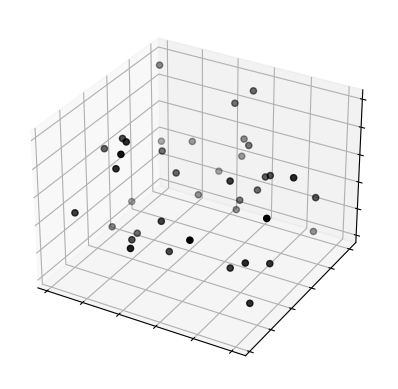

In [30]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

ax.scatter(values_3d[:,0],values_3d[:,1],values_3d[:,2], c='k')
plt.savefig('Plots/Cluster Centroids 3D', dpi=600)
plt.show()

In [23]:
values_2d = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(values_3d)

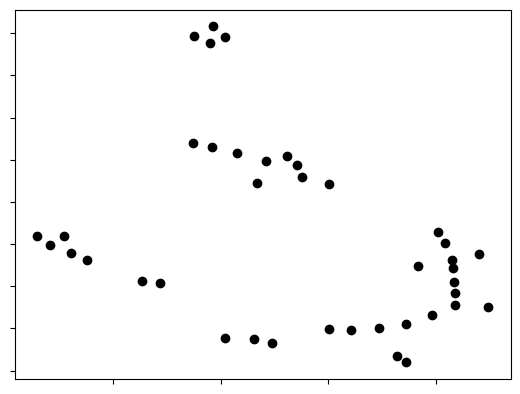

In [32]:
fig, ax = plt.subplots()

ax.set_xticklabels([])
ax.set_yticklabels([])
# ax.set_zticklabels([])

ax.scatter(values_2d[:,0],values_2d[:,1], c='k')
plt.savefig('Plots/Cluster Centroids 2D', dpi=600)
plt.show()

### K-Means representative clusters 

In [4]:
import sys
print(sys.path)
sys.path.remove('/opt/ros/kinetic/lib/python2.7/dist-packages')

['/home/satomm/Documents/LPBF_Cluster_And_XAI/src', '', '/opt/ros/kinetic/lib/python2.7/dist-packages', '/home/satomm/miniconda3/envs/multiclassMeltpool/lib/python37.zip', '/home/satomm/miniconda3/envs/multiclassMeltpool/lib/python3.7', '/home/satomm/miniconda3/envs/multiclassMeltpool/lib/python3.7/lib-dynload', '/home/satomm/miniconda3/envs/multiclassMeltpool/lib/python3.7/site-packages', '/home/satomm/miniconda3/envs/multiclassMeltpool/lib/python3.7/site-packages/IPython/extensions', '/home/satomm/.ipython']


In [5]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle

In [8]:
# data = pd.read_csv('neural_network_data/test_labels_pp_no_heating_scan_3d_8.csv')
data

,image_name,label,P,speed,accel,ed,heating,res_heat,stripe,concentric,island
0,layer14_1532.png,18,0.412525,0.599250,0.020722,-0.365749,0,-0.596039,1,0,1
1,layer153_4884.png,9,-0.377858,-0.829611,0.020722,0.139359,0,-0.577335,0,1,0
2,layer44_799.png,14,0.412802,0.601894,0.022852,-0.366651,0,-0.170185,1,0,1
3,layer198_1122.png,3,0.412138,0.600632,0.020722,-0.366363,0,-0.404812,0,1,1
4,layer138_179.png,0,-2.530646,-0.688656,0.634283,-0.834653,0,-0.024473,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
103099,layer63_2556.png,12,0.412525,-0.494534,-0.818664,0.199889,0,-0.459306,0,1,1
103100,layer65_2115.png,21,-2.770443,-1.362148,2.601299,-0.625265,0,-0.427054,1,0,1
103101,layer120_4453.png,22,0.360347,-1.086942,-0.471406,0.723058,0,-0.643815,0,1,0
103102,layer30_3151.png,12,0.411426,0.599437,0.020722,-0.366112,0,-0.449130,0,1,1


In [9]:
labels = np.array(data['label'])
labels

array([18,  9, 14, ..., 22, 12,  7])

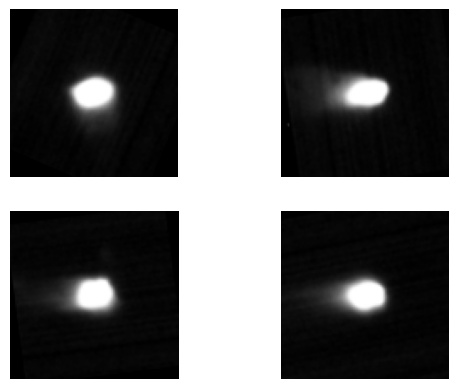

In [20]:
MELT_POOL_CLASS = 7

indx = np.where(labels == MELT_POOL_CLASS)[0]
image_names = np.array(data['image_name'])[indx]
total_images = len(image_names)
selected_img_indx = np.random.randint(0,total_images,4)
selected_img_name = image_names[selected_img_indx]

fig, ax = plt.subplots(2,2)

x = 0
y = 0
for name in selected_img_name:
    layer_num = name[:name.find('_')]
    full_img_name = '../../Melt Pool Camera Preprocessed PNG/' + layer_num + '/' + name
#     full_img_name = '../../../In-situ Meas Data/In-Situ Meas Data/Melt Pool Camera Preprocessed PNG/' + layer_num + '/' + name
    image = cv2.imread(full_img_name)
    ax[x, y].imshow(image)
    ax[x, y].axis('off')
    if x == 1:
        x = 0
        y += 1
    else:
        x = 1

# plt.savefig('Plots/Clusters/Final_8/Class' + str(MELT_POOL_CLASS+1) + '.png', dpi=600)

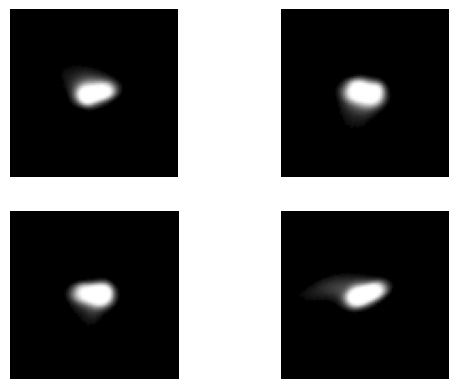

In [29]:
# RTC

MELT_POOL_CLASS = 5

indx = np.where(labels == MELT_POOL_CLASS)[0]
image_names = np.array(data['image_name'])[indx]
total_images = len(image_names)
selected_img_indx = np.random.randint(0,total_images,4)
selected_img_name = image_names[selected_img_indx]

fig, ax = plt.subplots(2,2)

x = 0
y = 0
for name in selected_img_name:
    if name.find('Base') >= 0:
        full_img_name = '../../../RTC_Images/Base/layer1_' + name[5:]
    else:
        full_img_name = '../../../RTC_Images/MPA/layer1_' + name[4:]
    layer_num = name[:name.find('_')]
    image = cv2.imread(full_img_name)
    ax[x, y].imshow(image)
    ax[x, y].axis('off')
    if x == 1:
        x = 0
        y += 1
    else:
        x = 1

plt.savefig('Plots/Clusters/RTC6/Class' + str(MELT_POOL_CLASS) + '.png', dpi=600)

In [7]:
with open('clusters2_meltpools.pkl', 'rb') as fp:
    clusters2_meltpools = pickle.load(fp)

meltpools_name = np.load("K_Means_Meltpools_Name.npy")

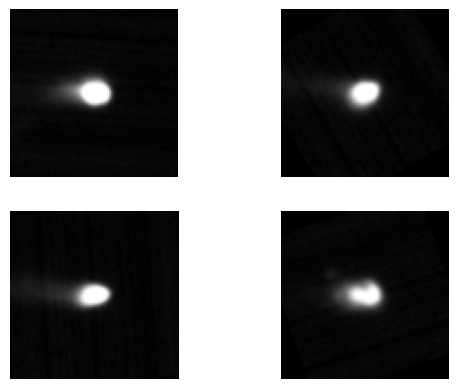

In [28]:
MELT_POOL_CLASS = 0

k = 8
grid_size = 2

###############################

num = 0
loc = (clusters2_meltpools[k] == MELT_POOL_CLASS).nonzero()

fig, axs = plt.subplots(grid_size,grid_size)
for jj in range(grid_size):
    for kk in range(grid_size):
        meltpool_class_ii = meltpools_name[loc[0][np.random.randint(0, len(loc[0])-1)]]
        meltpool_class_ii = '../../' + meltpool_class_ii[45:]
        image = cv2.imread(meltpool_class_ii)
        axs[jj, kk].imshow(image)
        axs[jj,kk].axis('off')
        num += 1
        
plt.savefig('Plots/Clusters/HighDim_8/Class' + str(MELT_POOL_CLASS+1) + '.png', dpi=600)

### Scan Strategy Visualizations 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
layer2 = pd.read_csv('../../Build Command Data/XYPT Commands/T500_3D_Scan_Strategies_fused_layer0002.csv', header=None)

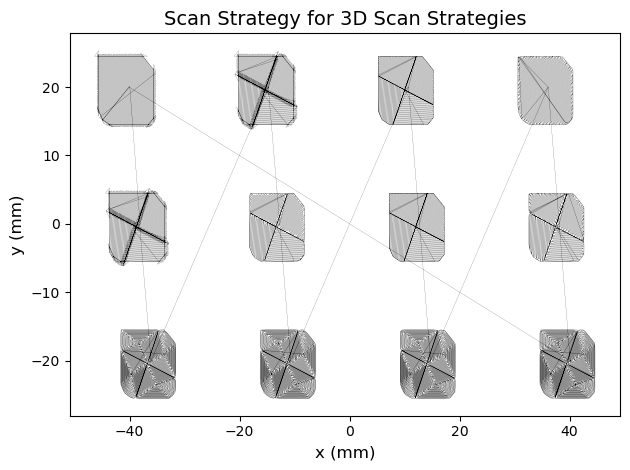

In [4]:
X = layer2[0]
Y = layer2[1]
indx = np.arange(0, len(X), 150)
plt.plot(X[indx], Y[indx], linewidth=0.1, c='k')
plt.title('Scan Strategy for 3D Scan Strategies', fontsize=14)
plt.xlabel('x (mm)', fontsize=12)
plt.ylabel('y (mm)', fontsize=12)
plt.tight_layout()
# plt.savefig('Plots/3D scan strategies_LowRes.png', dpi=150)
# plt.savefig('Plots/3D scan strategies.png', dpi=600)
plt.show()

In [5]:
len(X)

3019778

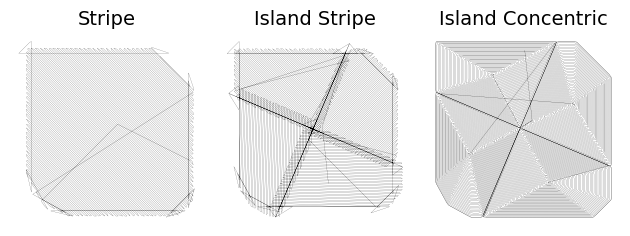

In [101]:
X = layer2[0]
Y = layer2[1]
indx1 = np.arange(20000, 200000, 150)
indx2 = np.arange(220000, 480000, 150)
# indx2 = np.arange(800000, 1050000, 150)
indx3 = np.arange(486000, 775000, 50)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.plot(X[indx1], Y[indx1], linewidth=0.1, c='k')
ax2.plot(X[indx2], Y[indx2], linewidth=0.1, c='k')
ax3.plot(X[indx3], Y[indx3], linewidth=0.1, c='k')
ax1.set_box_aspect(1)
ax2.set_box_aspect(1)
ax3.set_box_aspect(1)
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax1.set_title('Stripe', fontsize=14)
ax2.set_title('Island Stripe', fontsize=14)
ax3.set_title('Island Concentric', fontsize=14)
fig.tight_layout()
fig.savefig('../Plots/scan strategy examples_LowRes.png', dpi=150, bbox_inches='tight')
fig.savefig('../Plots/scan strategy examples.png', dpi=600, bbox_inches='tight')
fig.savefig('../Plots/scan strategy examples.svg', format='svg', dpi=600, bbox_inches='tight')
plt.show()

In [49]:
base = pd.read_csv('../../../RealTimeControl/RTC_XYL_DAQ_IN625_Ar_P01I2000D10_RefA400_Base.csv')

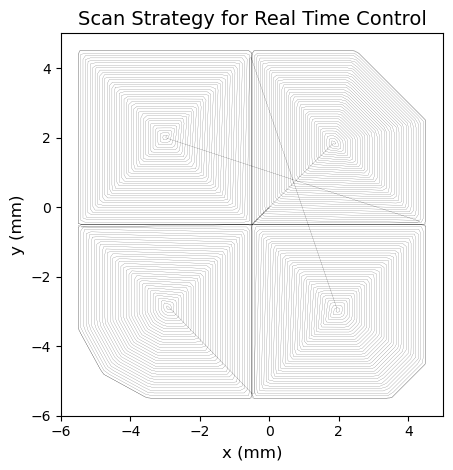

In [59]:
X = base['0']
Y = base['0.1']
indx = np.arange(0, len(X), 25)
plt.plot(X[indx], Y[indx], linewidth=0.1, c='k')
plt.title('Scan Strategy for Real Time Control', fontsize=14)
plt.xlabel('x (mm)', fontsize=12)
plt.ylabel('y (mm)', fontsize=12)
plt.axis('square')
plt.tight_layout()
plt.savefig('Plots/Real Time Control_LowRes.png', dpi=150)
plt.savefig('Plots/Real Time Control.png', dpi=600)
plt.show()

### K-Means Cluster Visualization

In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [11]:
data = pd.read_csv('neural_network_data/train_labels_pp_limited_scan_balanced_small_3d_8.csv')
data

,image_name,label,P,speed,accel,ed,heating,res_heat,stripe,concentric,island
0,layer213_5063.png,0,-0.379614,-0.832530,0.022852,0.140948,0,-0.689517,0,1,0
1,layer16_1712.png,0,0.412525,0.603558,0.020722,-0.367338,0,1.570444,1,0,1
2,layer53_2570.png,0,-3.238483,-3.055326,0.023735,4.009942,0,-0.546518,1,0,1
3,layer213_2417.png,0,-0.645466,0.597764,0.018591,-0.648003,0,-0.208673,0,1,0
4,layer128_623.png,0,0.411944,0.600293,0.020722,-0.366289,0,-0.375532,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
149995,layer68_2824.png,7,-1.180617,-2.259697,0.883403,2.131752,0,-0.561509,1,0,1
149996,layer18_582.png,7,0.412071,0.600393,0.022852,-0.366293,0,0.102279,0,1,1
149997,layer108_1794.png,7,-0.643795,0.601589,0.020722,-0.648685,0,0.324411,0,1,0
149998,layer39_3032.png,7,0.412525,-1.297554,0.018591,1.024105,0,-0.509010,0,1,1


In [12]:
labels = np.array(data['label'])
total_classes = np.max(labels) + 1
print('Total Classes: ' + str(total_classes))

Total Classes: 8


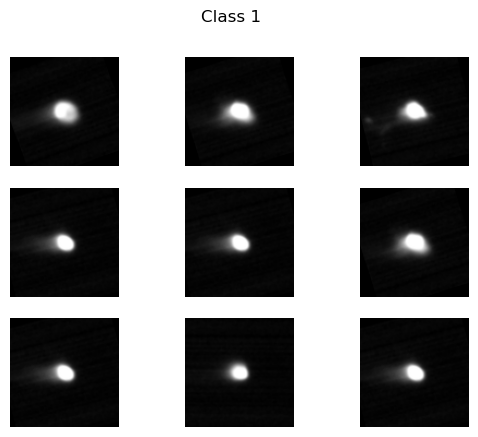

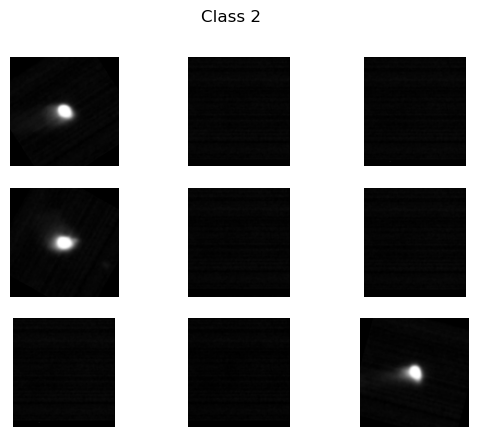

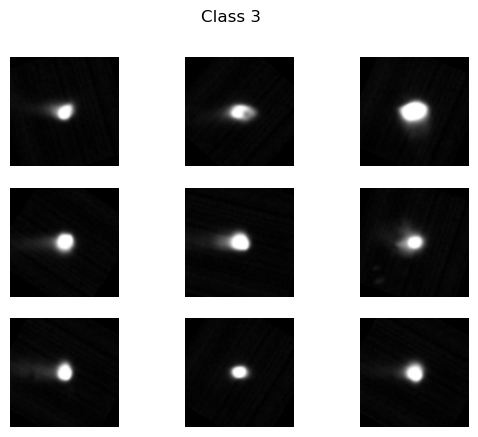

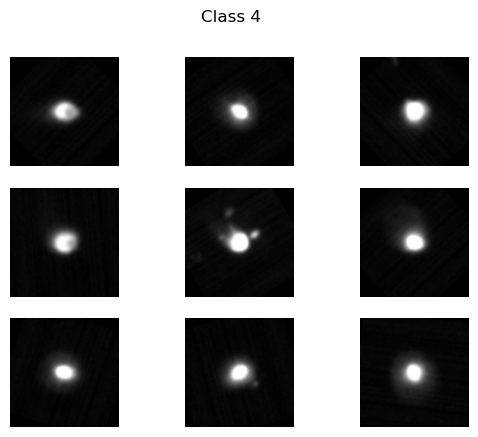

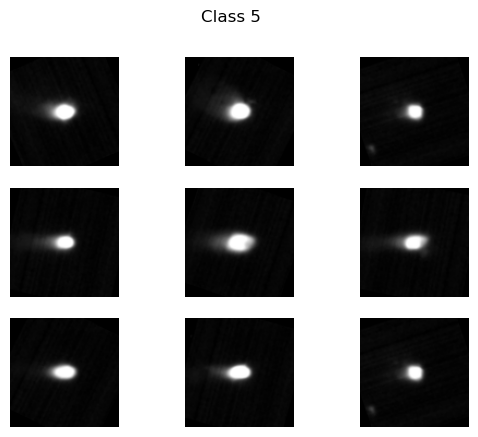

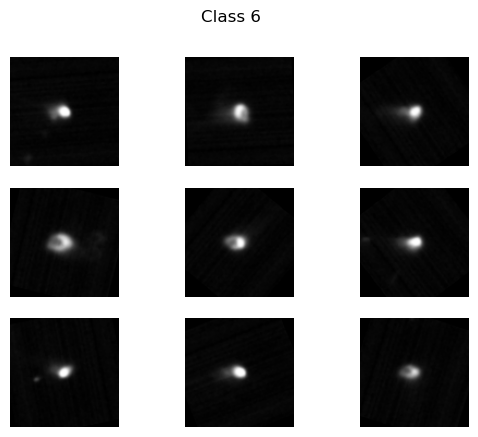

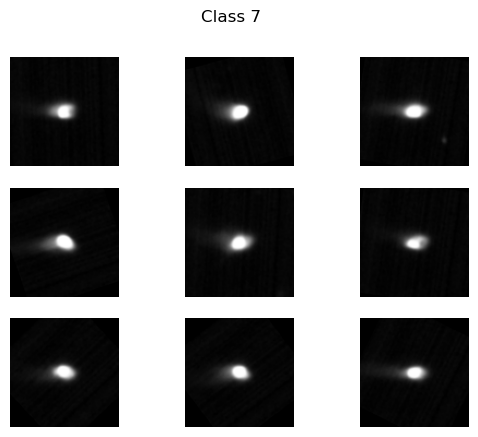

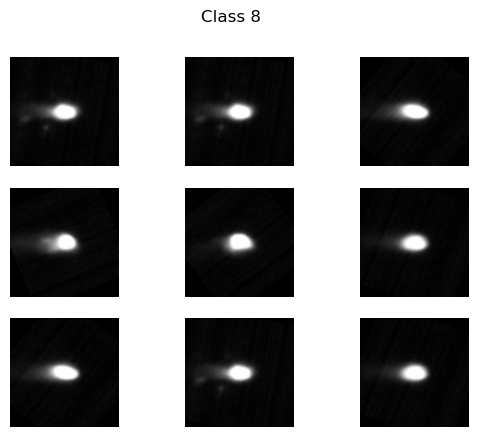

In [16]:
GRID_SIZE = 3
SAVE_DEST = 'Plots/Clusters/3d_scan_8/'

if not os.path.isdir(SAVE_DEST):
    os.mkdir(SAVE_DEST)
else:
    raise Exception("Images already exist")

for melt_pool_class in range(total_classes):
    indx = np.where(labels == melt_pool_class)[0]
    image_names = np.array(data['image_name'])[indx]
    total_images = len(image_names)
    selected_img_indx = np.random.randint(0,total_images,GRID_SIZE*GRID_SIZE)
    selected_img_name = image_names[selected_img_indx]

    fig, ax = plt.subplots(3,3)

    x = 0
    y = 0
    for name in selected_img_name:
        layer_num = name[:name.find('_')]
    #     full_img_name = '../../Melt Pool Camera Preprocessed PNG/' + layer_num + '/' + name
        full_img_name = '../../../In-situ Meas Data/In-Situ Meas Data/Melt Pool Camera Preprocessed PNG/' + layer_num + '/' + name
        image = cv2.imread(full_img_name)
        ax[x, y].imshow(image)
        ax[x, y].axis('off')
        fig.suptitle('Class ' + str(melt_pool_class+1))
        if x == GRID_SIZE-1:
            x = 0
            y += 1
        else:
            x += 1
        
    fig.savefig(SAVE_DEST + 'class' + str(melt_pool_class+1) + '.png', dpi=600)

### Show physical location of melt pool 8 in 3D scan strategies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pp_and_labels = pd.read_csv('neural_network_data/train_labels_pp_no_heating_scan_balanced_small_3d_8.csv')
labels = pp_and_labels['label']
image_names = pp_and_labels['image_name']

In [154]:
class8_names = image_names[labels==7]

layer_count = np.zeros((250,1))
for name in class8_names:
    layer_num = int(name[5:name.find('_')])
    layer_count[layer_num-1, 0] += 1
    
print('The layer with the most class 8\'s is: ' + str(np.argmax(layer_count)+1))

The layer with the most class 8's is: 183


In [155]:
np.flip(np.argsort(layer_count, axis=0))

array([[182],
       [ 53],
       [107],
       [ 38],
       [ 16],
       [ 67],
       [ 27],
       [ 51],
       [ 30],
       [ 17],
       [ 91],
       [ 70],
       [ 41],
       [ 14],
       [ 52],
       [118],
       [ 94],
       [ 75],
       [ 26],
       [151],
       [ 46],
       [ 62],
       [115],
       [ 79],
       [ 99],
       [226],
       [ 22],
       [ 65],
       [116],
       [ 28],
       [128],
       [ 77],
       [ 13],
       [ 88],
       [ 19],
       [247],
       [ 37],
       [140],
       [158],
       [ 80],
       [154],
       [ 50],
       [177],
       [ 98],
       [104],
       [ 29],
       [139],
       [ 64],
       [164],
       [ 55],
       [224],
       [ 92],
       [103],
       [202],
       [ 74],
       [212],
       [  7],
       [178],
       [119],
       [134],
       [  8],
       [ 21],
       [236],
       [176],
       [ 47],
       [152],
       [ 39],
       [ 25],
       [106],
       [130],
       [ 15],
      

In [156]:
xy_data = pd.read_csv('../../Build Command Data/XYPT Commands/T500_3D_Scan_Strategies_fused_layer0039.csv', header=None)
x = np.array(xy_data[0])
y = np.array(xy_data[1])
t = xy_data[3]

In [157]:
x = x[t>0]
y = y[t>0]

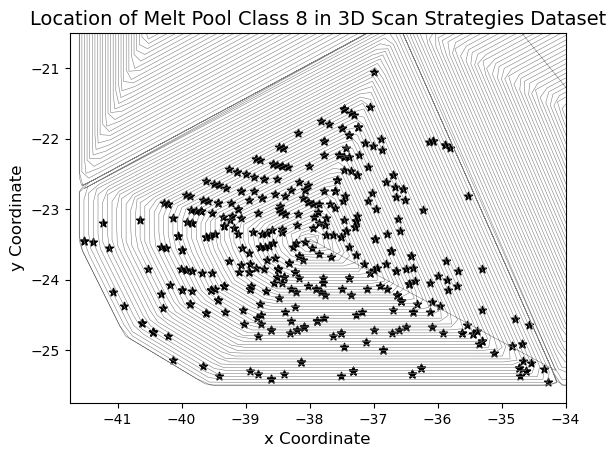

In [159]:
plot_indices = np.arange(0, len(x), 1)
plt.plot(x[plot_indices],y[plot_indices], lw=0.4, color='gray')
for name in class8_names:
    layer_num = int(name[5:name.find('_')])
    if layer_num == 39:
        image_num = int(name[name.find('_')+1:name.find('.png')])-1
        if image_num < 1700:
            plt.scatter(x[image_num], y[image_num], color='black', marker='*')
plt.xlim((-41.75, -34))
plt.ylim((-25.75, -20.5))
plt.xlabel('x Coordinate', fontsize=12)
plt.ylabel('y Coordinate', fontsize=12)
plt.title('Location of Melt Pool Class 8 in 3D Scan Strategies Dataset', fontsize=14)
plt.savefig('Plots/MeltPoolClass8_location_LowRes', dpi=150)
plt.savefig('Plots/MeltPoolClass8_location', dpi=600)
plt.show()

In [5]:
class6_names = image_names[labels==5]

layer_count = np.zeros((250,1))
for name in class6_names:
    layer_num = int(name[5:name.find('_')])
    layer_count[layer_num-1, 0] += 1
    
print('The layer with the most class 6\'s is: ' + str(np.argmax(layer_count)+1))

The layer with the most class 6's is: 131


In [6]:
np.flip(np.argsort(layer_count, axis=0))

array([[130],
       [241],
       [141],
       [ 31],
       [ 19],
       [ 43],
       [ 42],
       [215],
       [ 16],
       [214],
       [ 32],
       [239],
       [143],
       [191],
       [ 20],
       [131],
       [179],
       [ 44],
       [ 10],
       [119],
       [227],
       [203],
       [155],
       [  2],
       [ 11],
       [107],
       [  1],
       [178],
       [213],
       [167],
       [ 68],
       [ 40],
       [ 39],
       [154],
       [230],
       [ 95],
       [202],
       [ 55],
       [ 41],
       [ 38],
       [ 83],
       [ 74],
       [ 18],
       [194],
       [ 14],
       [ 91],
       [ 71],
       [238],
       [ 26],
       [170],
       [233],
       [ 29],
       [134],
       [210],
       [ 59],
       [ 33],
       [248],
       [ 28],
       [ 56],
       [ 86],
       [ 27],
       [206],
       [  8],
       [187],
       [ 17],
       [177],
       [158],
       [190],
       [182],
       [122],
       [ 79],
      

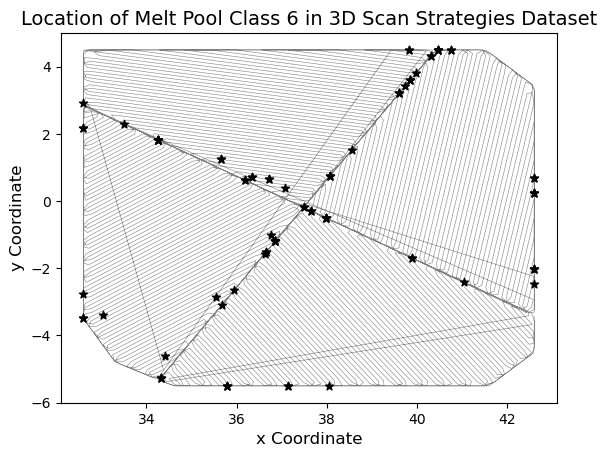

In [11]:
xy_data = pd.read_csv('../../Build Command Data/XYPT Commands/T500_3D_Scan_Strategies_fused_layer0155.csv', header=None)
x = np.array(xy_data[0])
y = np.array(xy_data[1])
t = xy_data[3]

x = x[t>0]
y = y[t>0]

plot_indices = np.arange(0, len(x), 1)
plt.plot(x[plot_indices],y[plot_indices], lw=0.4, color='gray', zorder=1)
for name in class6_names:
    layer_num = int(name[5:name.find('_')])
    if layer_num == 155:
        image_num = int(name[name.find('_')+1:name.find('.png')])-1
#         if image_num < 1700:
        plt.scatter(x[image_num], y[image_num], color='black', marker='*', zorder=2)
plt.xlabel('x Coordinate', fontsize=12)
plt.ylabel('y Coordinate', fontsize=12)
plt.title('Location of Melt Pool Class 6 in 3D Scan Strategies Dataset', fontsize=14)
plt.savefig('Plots/MeltPoolClass6_location_LowRes', dpi=150)
plt.savefig('Plots/MeltPoolClass6_location', dpi=600)
plt.show()